# Rate of Growth –– Covid19

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Get the rate of Growth of Covid-19 in Each country or world
# Enter Country Name of "world" for wordly growth rate
country = "US"
cases_type = "Deaths" # options: confirmed, recovered, and deaths

In [15]:
#Get live Data from https://data.humdata.org/
confirmed_cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
recovered_cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv")
total_deaths = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")

In [16]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [17]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,32,40,43,54,99,112,131
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,182,197,217,232,248,251,277,283,302,314
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,405,460,591,601,691,708,783,846,894,1047
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,71,71,128,128,128,169,169,191,205,235
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,4,4,4,5,5,5,5,6,6


In [18]:
total_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,18,18,21,23,25,30,30,30,33
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,24,25,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,256,275,293,313,326,336,348,364,367,375
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,26,29,29,31,33,33,35,35,36
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [30]:
def grab_by_country(data, dates,country):
    
    result = np.zeros(len(dates))
    for i, row in data.iterrows():
        if country == "world" or row[1] == country:
            for i, date in enumerate(dates):
                result[i] += row[date]
                
    return result

In [31]:
if cases_type == "confirmed":
    data = confirmed_cases
elif cases_type == "recovered":
    data = recovered_cases
else: data = total_deaths

In [38]:
# Extract Data for Each Country
dates = data.keys()[4:]
#list of number of cases from day 1 till now
select_data = grab_by_country(data, dates, country)
#Get Daily Increments
diffs = [ select_data[i] if i == 0 else select_data[i] - select_data[i - 1] for i in range(len(select_data))]
print("New Cases Per Day")
df = pd.DataFrame({'Date': dates, 'Cases': diffs})
df

New Cases Per Day


,Date,Cases
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
84,4/15/20,2494.0
85,4/16/20,4591.0
86,4/17/20,3857.0
87,4/18/20,1891.0


In [22]:
# Convert dates to datetime
dates_ = [dt.datetime.strptime(date, '%m/%d/%y') for date in dates]

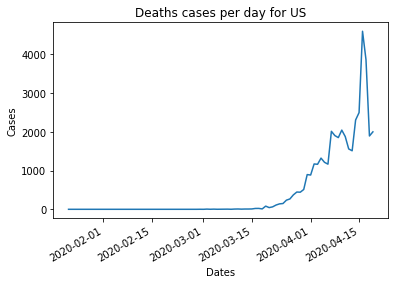

In [23]:
fig, ax = plt.subplots()
ax.plot(dates_, diffs)

plt.title(cases_type + " cases per day for " + country)

plt.xlabel("Dates")
plt.ylabel("Cases")

fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()

In [24]:
print("Average number of infections per day: ", np.mean(diffs))
print("Standard Deviation: ", np.std(diffs))
print("Percentile: ", np.percentile(diffs, 50))

Average number of infections per day:  456.86516853932585
Standard Deviation:  885.4775540206595
Percentile:  3.0
